In [1]:
import numpy as np

from src.autoencoder import FashionDenoisingAutoEncoder

import torch

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [2]:
dataset = datasets.FashionMNIST(
    root="../../data", train=False, download=True,
    transform=transforms.ToTensor()
)

Noise for Denoising AE could not be just random noise. It could be a removed part of the image.

Lets remove upper and right part of the image and train the model to restore it.

In [3]:
def mask_img_by_xy(image: torch.Tensor, mask_fraction: float = 0.25) -> torch.Tensor:
    masked_rows = int(mask_fraction * image.shape[1])
    masked_cols = int(mask_fraction * image.shape[2])
    mask = torch.ones_like(image)
    mask[:, :masked_rows, :] = 0
    mask[:, :, :masked_cols] = 0
    return image * mask

In [4]:
X = dataset.data.float() / 255
y = dataset.targets

In [5]:
X_masked = mask_img_by_xy(X)

In [6]:
def plot_each_class(X: torch.Tensor, y: torch.Tensor, n: int = 10, title: str = '') -> None:
    fig, axes = plt.subplots(10, n, figsize=(n, 10))
    for class_i in range(10):
        digit_indices = (y == class_i).nonzero().flatten()
        for i in range(n):
            axes[class_i, i].imshow(X[digit_indices[i]].reshape(28, 28), cmap='gray')
            axes[class_i, i].axis('off')
            if i == 0:
                axes[class_i, i].set_title(f'{class_i}', rotation='horizontal', x=-.1, y=0.5)
    fig.suptitle(title)
    plt.subplots_adjust(hspace=5e-2, wspace=5e-2)
    plt.show()

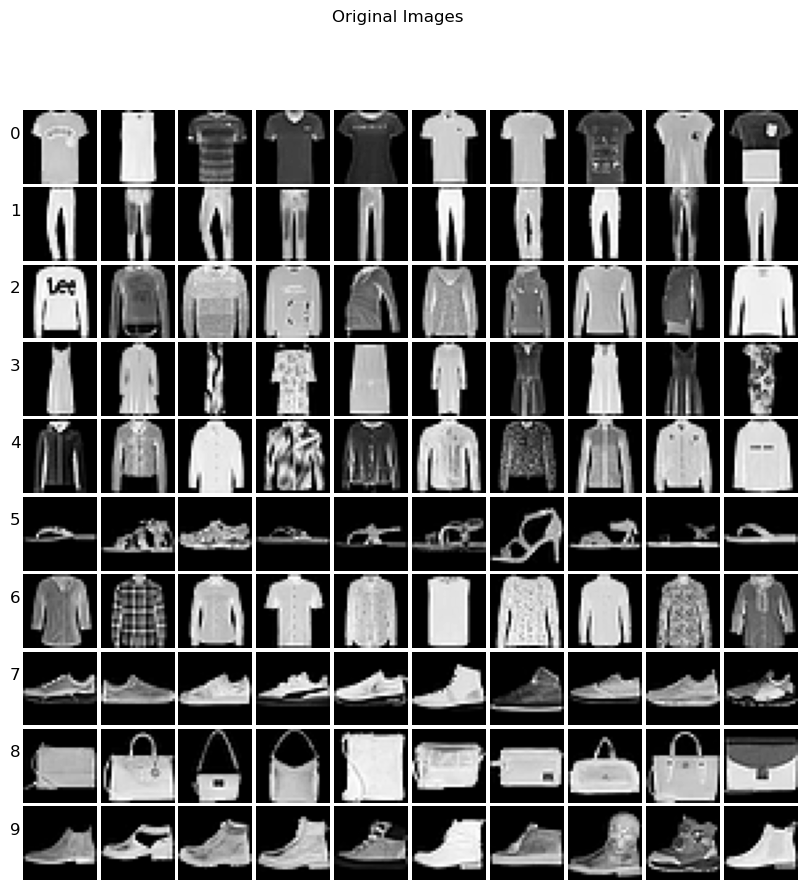

In [7]:
plot_each_class(X, y, title='Original Images')

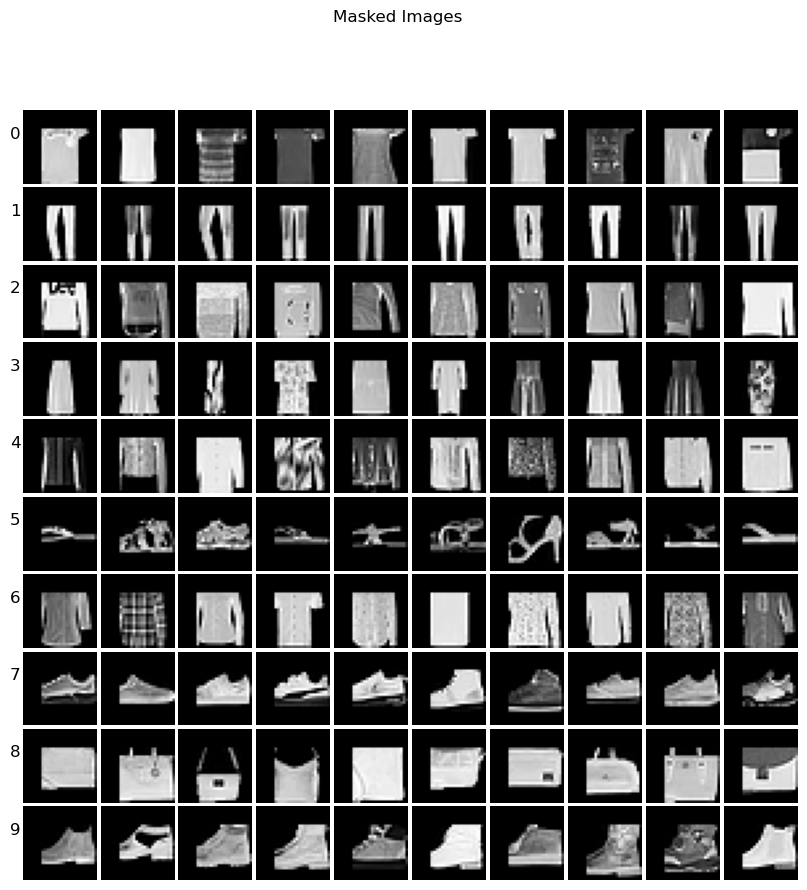

In [8]:
plot_each_class(X_masked, y, title='Masked Images')

In [10]:
model = FashionDenoisingAutoEncoder(784, 128)
model.load_state_dict(
    torch.load('../../models/fashion_denoise_autoencoder174.pth',
               weights_only=True, map_location='cpu'
               )
)

<All keys matched successfully>

In [11]:
model.eval()

FashionDenoisingAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

In [12]:
X_reconstructed = model(X_masked.view(-1, 784)).detach()

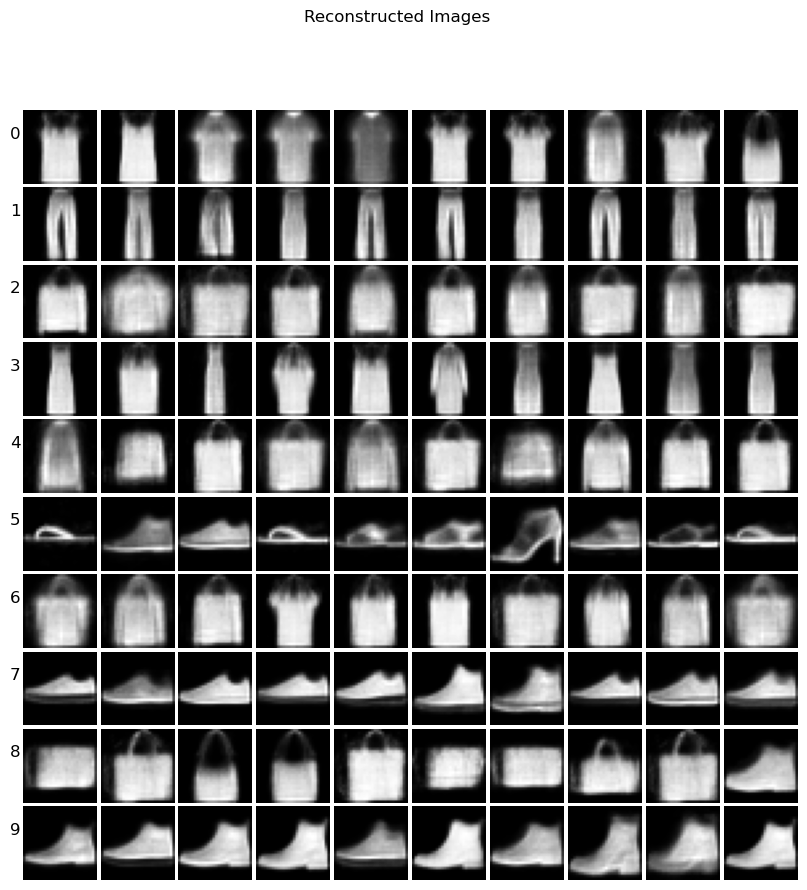

In [13]:
plot_each_class(X_reconstructed, y, title='Reconstructed Images')

Denoising AE restored images with removed parts, but a lot of details are lost. 

Also it preferred to restore rectangular shapes as a bag.